In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import scipy.stats as stats
import pandas as pd
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots

In [101]:
def plot_exp(beta, color):
    data = np.random.exponential(scale=beta, size=2000)
    CV = np.var(data)/np.mean(data)**2
    sns.distplot(data, color=color, label="CV "+str(CV))
    plt.axvline(x=beta, color=color, linestyle="--")
    plt.legend()

def plot_gamma(k, beta, color):
    data = np.random.gamma(k, beta, size=2000)
    CV = np.var(data)/np.mean(data)**2
    sns.distplot(data, color=color, label="CV "+str(CV))
    plt.axvline(x=k/beta, color=color, linestyle="--")
    plt.legend()
    
def plot_process(CV, mean, color):
    data = np.random.gamma(1./CV, CV*mean, size=10000)
    CV = np.var(data)/np.mean(data)**2
    sns.distplot(data, color=color, label="CV "+str(CV))
    observed_mean = np.mean(data)
    assert np.all(data>=0)
    plt.axvline(x=observed_mean, color=color, linestyle="--")
    plt.legend()

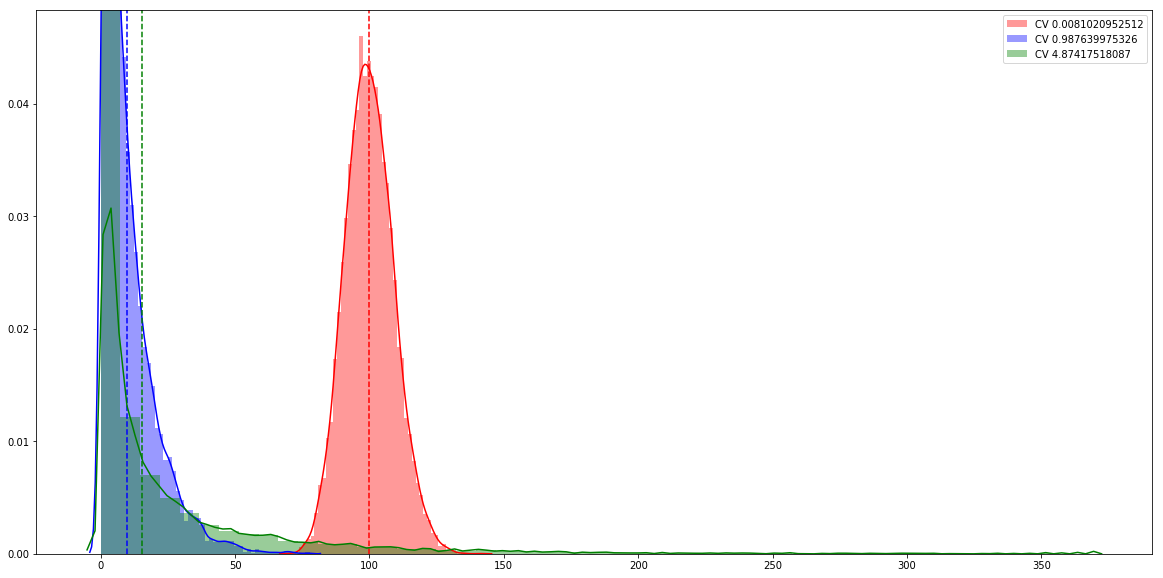

In [103]:
plt.figure(figsize=(20,10))
plot_process(0.008, 100, 'r')
plot_process(1, 10, 'b')
plot_process(5, 15, 'g')

In [153]:
def mix_randomly(dists, skewedness):
    N,D = dists.shape
    print N,D
    values = np.random.dirichlet(np.ones(N)/skewedness,size=1)[0]
    print values
    indices = np.random.choice(np.arange(N),1,p=values)
    return dists.T[np.arange(D), indices]

def plot_hyperexp(betas, skewedness, color):
    dists = np.concatenate([[np.random.exponential(scale=beta, size=2000)] for beta in betas])
    data = mix_randomly(dists, skewedness)
    CV = np.var(data)/np.mean(data)**2
    sns.distplot(data, color=color, label="CV "+str(CV))
    plt.axvline(x=np.mean(data), color=color, linestyle="--")
    plt.legend()

seed 759398
betas [ 0.06  0.09  0.09  0.08  0.04  0.08  0.    0.03  0.05  0.01]
10 2000
[  1.00482907e-04   8.64088143e-31   1.23263865e-12   7.13032837e-30
   1.59968022e-03   8.05665098e-12   6.00205081e-50   1.42369121e-08
   9.98299823e-01   7.89364084e-63]


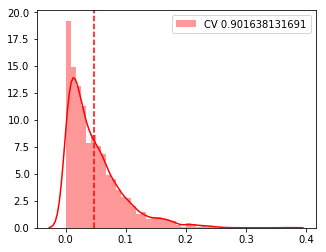

In [192]:
seed = int(np.random.rand()*1000000)
print "seed", seed
np.random.seed(seed)
betas = np.random.choice(np.arange(10)/100., 10)
print "betas", betas
plot_hyperexp(betas, 100, 'r')

<img src="https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+f_X%28x%29%3Dp_1+%5Ccdot+%28%5Clambda_1+e%5E%7B-%5Clambda_1+%5C+x%7D%29%2Bp_2+%5Ccdot+%28%5Clambda_2+e%5E%7B-%5Clambda_2+%5C+x%7D%29%2B%5Ccdots%2Bp_n+%5Ccdot+%28%5Clambda_n+e%5E%7B-%5Clambda_n+%5C+x%7D%29+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%281%29&bg=ffffff&fg=333333&s=0&zoom=2">
<img src="https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+E%5BX%5D%3Dp_1+%5Ccdot+%5Cbiggl%28%5Cfrac%7B1%7D%7B%5Clambda_1%7D+%5Cbiggr%29%2Bp_2+%5Ccdot+%5Cbiggl%28%5Cfrac%7B1%7D%7B%5Clambda_2%7D+%5Cbiggr%29%2B%5Ccdots%2Bp_n+%5Ccdot+%5Cbiggl%28%5Cfrac%7B1%7D%7B%5Clambda_n%7D+%5Cbiggr%29+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%284%29&bg=ffffff&fg=333333&s=0&zoom=2">
<img src="https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+Var%5BX%5D%3DE%5BX%5E2%5D-E%5BX%5D%5E2%3D%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cbiggl%28%5Cfrac%7B2%7D%7B%5Clambda_i%5E2%7D+%5Cbiggr%29-%5Cbiggl%28%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cfrac%7B1%7D%7B%5Clambda_i%7D+%5Cbiggr%29%5E2+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%287%29&bg=ffffff&fg=333333&s=0&zoom=2">


<img src="https://s0.wp.com/latex.php?latex=%5Cdisplaystyle+%5Cbegin%7Baligned%7D+%26%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cbiggl%28%5Cfrac%7B1%7D%7B%5Clambda_i%5E2%7D+%5Cbiggr%29-%5Cbiggl%28%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cfrac%7B1%7D%7B%5Clambda_i%7D+%5Cbiggr%29%5E2+%3E+0+%5C%5C%26%5Ctext%7B+%7D+%5C%5C%26%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cbiggl%28%5Cfrac%7B2%7D%7B%5Clambda_i%5E2%7D+%5Cbiggr%29-2+%5Ctimes+%5Cbiggl%28%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cfrac%7B1%7D%7B%5Clambda_i%7D+%5Cbiggr%29%5E2+%3E+0+%5C%5C%26%5Ctext%7B+%7D+%5C%5C%26%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cbiggl%28%5Cfrac%7B2%7D%7B%5Clambda_i%5E2%7D+%5Cbiggr%29-%5Cbiggl%28%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cfrac%7B1%7D%7B%5Clambda_i%7D+%5Cbiggr%29%5E2+%3E+%5Cbiggl%28%5Csum+%5Climits_%7Bi%3D1%7D%5En+%5C+p_i+%5Cfrac%7B1%7D%7B%5Clambda_i%7D+%5Cbiggr%29%5E2+%5C%5C%26%5Ctext%7B+%7D+%5C%5C%26Var%5BX%5D+%3E+E%5BX%5D%5E2+%5C%5C%26%5Ctext%7B+%7D+%5C%5C%26+%5Csigma_X+%3E+E%5BX%5D+%5C%5C%26%5Ctext%7B+%7D+%5C%5C%26+%5Cfrac%7B%5Csigma_X%7D%7BE%5BX%5D%7D+%3E+1+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%5C+%289%29+%5Cend%7Baligned%7D&bg=ffffff&fg=333333&s=0&zoom=2">

In [45]:
import time
import datetime

result = []
for i in xrange(1, 101): # from 1 to 100 ms
    trial = []
    for j in xrange(100): # 20 trials
        start = datetime.datetime.now()
        time.sleep(i*0.001/100)
        stop = datetime.datetime.now()
        elapsed = (stop - start).total_seconds() * 1000
        trial.append(elapsed)
    print "Finished trial {}".format(i)
    result.append(trial)

print result

Finished trial 1
Finished trial 2
Finished trial 3
Finished trial 4
Finished trial 5
Finished trial 6
Finished trial 7
Finished trial 8
Finished trial 9
Finished trial 10
Finished trial 11
Finished trial 12
Finished trial 13
Finished trial 14
Finished trial 15
Finished trial 16
Finished trial 17
Finished trial 18
Finished trial 19
Finished trial 20
Finished trial 21
Finished trial 22
Finished trial 23
Finished trial 24
Finished trial 25
Finished trial 26
Finished trial 27
Finished trial 28
Finished trial 29
Finished trial 30
Finished trial 31
Finished trial 32
Finished trial 33
Finished trial 34
Finished trial 35
Finished trial 36
Finished trial 37
Finished trial 38
Finished trial 39
Finished trial 40
Finished trial 41
Finished trial 42
Finished trial 43
Finished trial 44
Finished trial 45
Finished trial 46
Finished trial 47
Finished trial 48
Finished trial 49
Finished trial 50
Finished trial 51
Finished trial 52
Finished trial 53
Finished trial 54
Finished trial 55
Finished trial 56
F

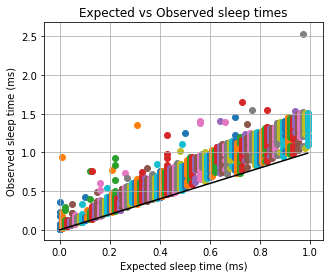

In [46]:
for i in np.arange(len(result)):
    plt.scatter(np.ones(100)*i/100, result[i])
plt.title("Expected vs Observed sleep times")
plt.xlabel("Expected sleep time (ms)")
plt.ylabel("Observed sleep time (ms)")
plt.plot(np.arange(100)/100., np.arange(100)/100., color="k")
plt.grid(True)

In [47]:
import time
import datetime

result = []
for i in xrange(1, 101): # from 1 to 100 ms
    trial = []
    for j in xrange(100): # 20 trials
        start = datetime.datetime.now()
        time.sleep(i*0.001)
        stop = datetime.datetime.now()
        elapsed = (stop - start).total_seconds() * 1000
        trial.append(elapsed)
    print "Finished trial {}".format(i)
    result.append(trial)

print result

Finished trial 1
Finished trial 2
Finished trial 3
Finished trial 4
Finished trial 5
Finished trial 6
Finished trial 7
Finished trial 8
Finished trial 9
Finished trial 10
Finished trial 11
Finished trial 12
Finished trial 13
Finished trial 14
Finished trial 15
Finished trial 16
Finished trial 17
Finished trial 18
Finished trial 19
Finished trial 20
Finished trial 21
Finished trial 22
Finished trial 23
Finished trial 24
Finished trial 25
Finished trial 26
Finished trial 27
Finished trial 28
Finished trial 29
Finished trial 30
Finished trial 31
Finished trial 32
Finished trial 33
Finished trial 34
Finished trial 35
Finished trial 36
Finished trial 37
Finished trial 38
Finished trial 39
Finished trial 40
Finished trial 41
Finished trial 42
Finished trial 43
Finished trial 44
Finished trial 45
Finished trial 46
Finished trial 47
Finished trial 48
Finished trial 49
Finished trial 50
Finished trial 51
Finished trial 52
Finished trial 53
Finished trial 54
Finished trial 55
Finished trial 56
F

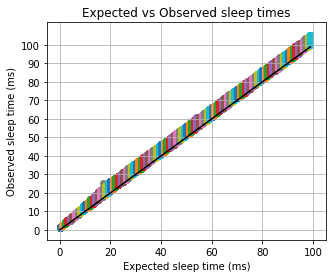

In [48]:
for i in np.arange(len(result)):
    plt.scatter(np.ones(100)*i, result[i])
plt.title("Expected vs Observed sleep times")
plt.xlabel("Expected sleep time (ms)")
plt.ylabel("Observed sleep time (ms)")
plt.plot(np.arange(100), np.arange(100), color="k")
plt.yticks(np.arange(0,101,10))
plt.grid(True)